#### Note:
  
Before starting to go through the tutorial, it is possible that your computer might not show the plots in the notebook from the start. If you're just looking to go through the notebook and are not interested in running the notebook, I'd suggest you to go to the link (https://drive.google.com/open?id=1scUJKFeENSaJW5JBAeT_xSlldI_5h31N) and download the html version of the notebook. That will show all the interactive bokeh plots. If you try to run the Jupyter Notebook directly, it might not work as you may not have bokeh installed on your computer.  
  
To test out and play around with the code: 
1. Please download the datasets into the directory where you store the notebook. 
2. Install bokeh by running the command 'pip install bokeh' in your command line
3. Install the bokeh sample data by running the code for sample data given in the notebook
4. Enjoy the visualizations and play around with the code to learn more.

Note: The datasets are available on this link: https://drive.google.com/open?id=111fa71h7ZNyZ2eMzO27vYS-_vTy02bK9

# Basic insightful visualization using Bokeh
### Motivation
The motivation behind taking this up as a topic for my tutorial was to explain a small yet important component of the data science pipeline i.e. Visualization. Data Science is all about solving the right problems, and data exploration becomes really important in understanding the condition of the data that we have. It is absolutely essential to understand what the pain points are and visualization is a great tool in actually viewing that graphically instead of comparing data stored in table, JSON or XML formats.  
Just to express my point a little further, here is an image that was published in Business Broadway regarding the most heavily used Data Science Methods at work (source:http://businessoverbroadway.com/top-machine-learning-and-data-science-methods-used-at-work). Data visualization turned out to be the most heavily used method in a Data Science workplace. More details are in the image description as follows


<img src='http://businessoverbroadway.com/wp-content/uploads/2018/01/data_science_methods_used_2017.png'>

## Purpose and Flow
Through this tutorial, my goal is to make the reader understand why visualization is important, and how the visualization library : Bokeh in python can be used to make interactive and insightful pictorial representations of data.  
The tutorial will walk you through different types of meaningful visualizations that can be done using Bokeh and how various components of the library work. In the tutorial, I have also provided coded examples of data extraction, processing and exploration through visualization. I will also explain how the visualizations were able to provide insights about the data which would not be otherwise possible, or be extremely difficult, by simply looking at the data.

### Bokeh Installation
Bokeh installation is simple and if you are running Anaconda, you can use either of the following commands in your **command line**

In [ ]:
pip install bokeh
or 
conda install bokeh

### Bokeh sampledata
Bokeh comes with some sample data which can be used to test out various visualizations, but our task is not to just understand how the visualization library works, but also to see how we can prepare and process our data to make it ready for  visualization and exploration. However, for the purpose of knowing, bokeh sampledata can be downloaded using the following statement in Jupyter Notebooks

In [ ]:
import bokeh.sampledata  
bokeh.sampledata.download()

### Bokeh Interfaces
Bokeh comes prepackaged with 2 interfaces: bokeh.plotting and bokeh.models  
  
bokeh.models is a very low level interface and provides an extreme amount of modifiability to the plots that we create. It relies hugely in gathering inputs from the user and one could simply say, it is a developer's tool.  
  
bokeh.plotting is a mid level interace which provides some degree of abstraction, yet maintaining flexibility in terms of the visuals we generate. It still allows the user to have a lot of customizations as per their requirement. For the purpose of this tutorial, we will rely on using bokeh.plotting and maybe include some elements of bokeh.models when required.

## Let's jump right in
We will be using this tutorial in a way of learning by examples. Each example will have a brief description of the data used and the type of visualization used. Just to get an overview, we will target understanding few basic plots, why they were used, and the comments provided in the code will explain how the code flows.   
**Please read the code comments carefully to understand what the smaller components of the code might be doing.**

## 1. Image RGB histogram
In this example, the idea is to import a locally available image and break it into its three main colour components: red, green and blue (RGB). The color value each component of RGB varies from 0 to 255 (0 being darkest, and 255 being brightest). We are trying to view how many pixels of each degree (0 to 255) for the RGB components are present in the image. A histogram for each color component provides us a the count of pixels in the image.

Loading BokehJS ...

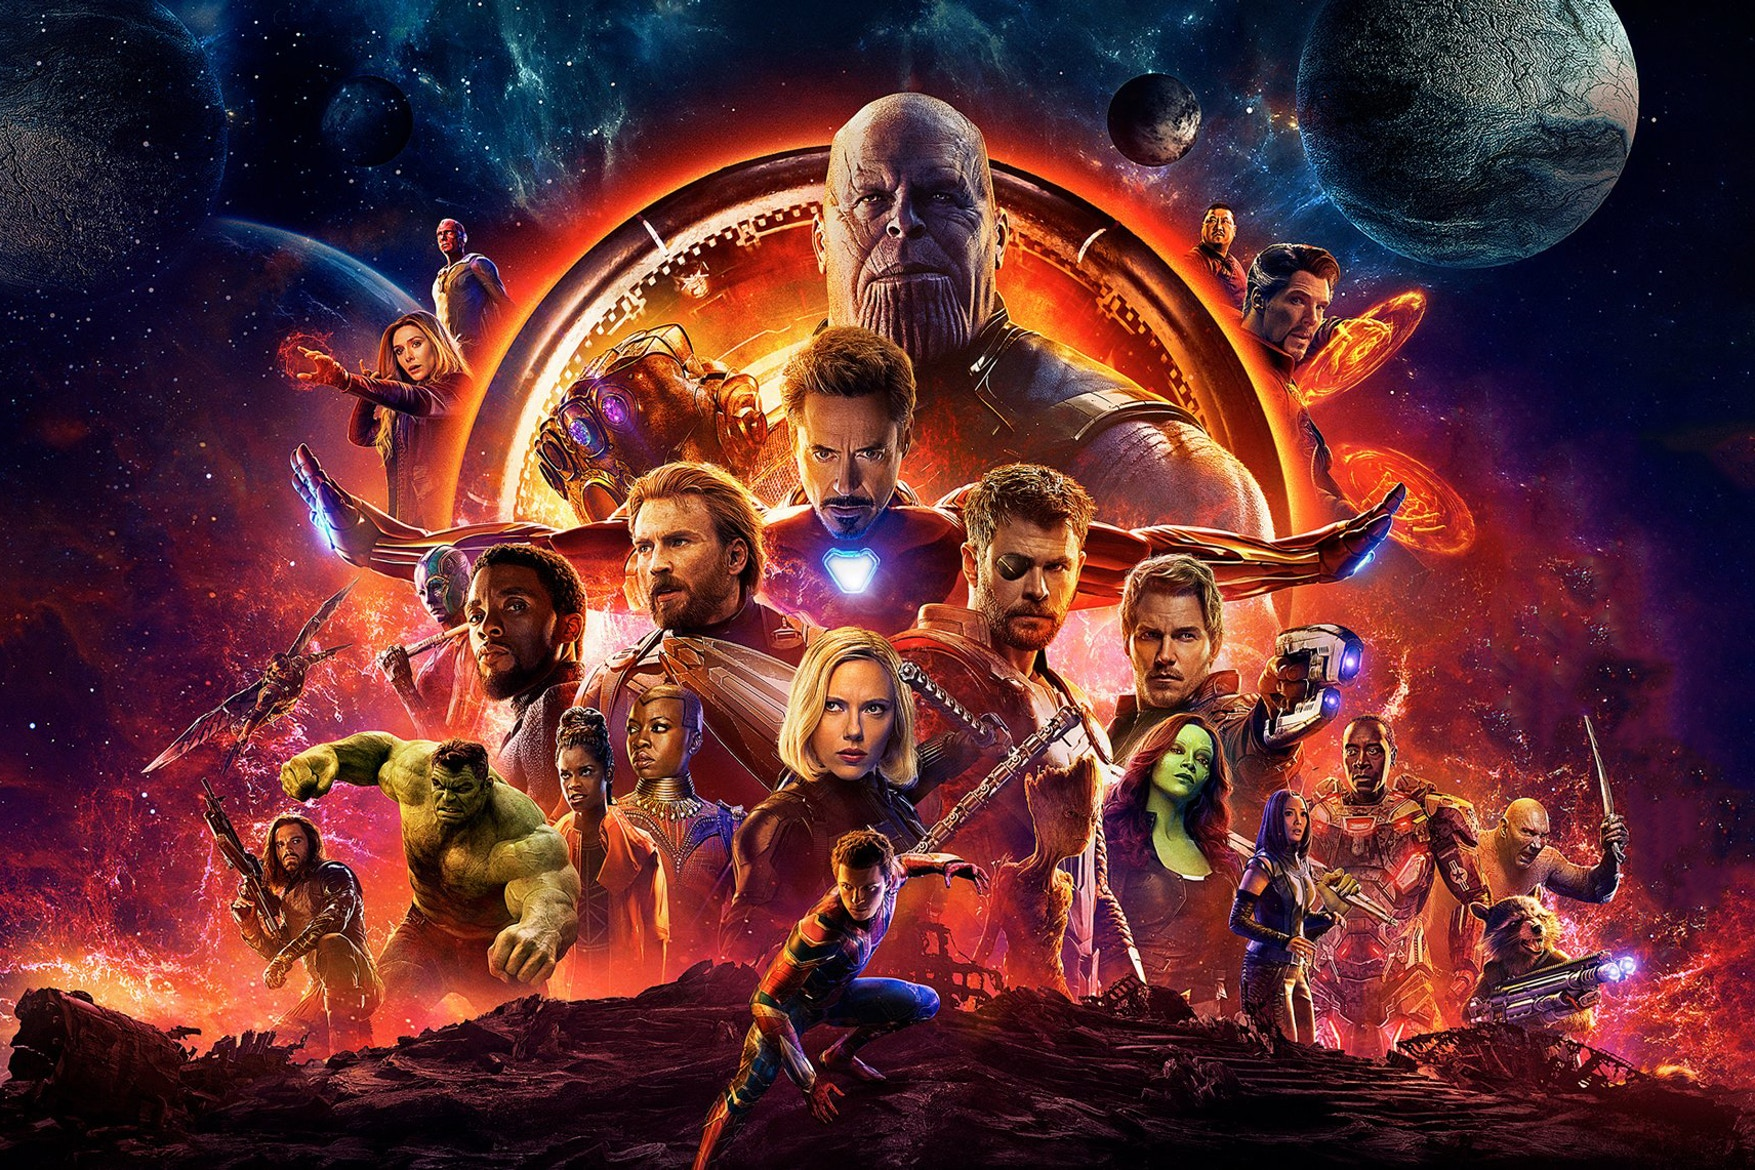

In [1]:
from IPython.display import Image
from bokeh.plotting import figure,output_notebook,show
# bokeh.plotting is the interface we use to create this visualization
# We import figure as the basic framework(canvas) on which we will then perform our plotting
# output_notebook is used to plot the figure within the Jupyter notebook itself.
# We can also plot the image in a seperate html by using output_file, but let's stick to this for now.

from bokeh.layouts import row
# We import row from bokeh.layouts to plot multiple figures side by side (in a row)

output_notebook()

#pip install PIL
import PIL.Image as s
# PIL is the python imaging library used to handle image data. This is what we're using to break down the image into RGB

im = s.open("avengers-infinity-war.jpg")
l = im.histogram() 
# converts the image into a list of 768 elements (256 each for red,green,blue(RGB)) 
# with number of pixels with each value of the RGB spectrum 

r = figure(plot_width=400, plot_height=400,y_axis_label = "No. of pixels",x_axis_label = "Color Range Red (0-255)")
"""
figure is the basic framework or in other words the canvas that we take before we start plotting anything. It is 
like the sheet of paper that we start to draw on. Now this sheet of paper can have multiple features and attributes
like the dimensions, texture etc. Similarly the figure also has many attributes like:
• plot_width
• plot_height
• y_axis_label
• x_axis_label
• title
and many more.
figure is like the foundational block in bokeh.plotting 

"""
    
r.vbar(x = range(0,256),top =l[0:256],width=0.2,color = "red",alpha = 0.7)
"""
Now with 'r' being our figure object, we can add many types of figure objects which are called glyphs. Glyphs plotted
over the figure object can be of many types like:
• vbar (vertical bar)
• hbar (horizontal bar)
• circle
• patch
to name a few
We will see more types of glyphs as we proceed through this tutorial. Like for figures, we can also provide attributes to
glyphs. Some attributes are required e.g. data source, and some attributes are optional e.g color, alpha etc

"""

g = figure(plot_width=400, plot_height=400,y_axis_label = "No. of pixels",x_axis_label = "Color Range Green (0-255)")
g.vbar(x = range(0,256),top =l[256:512],width=0.2,color = "green",alpha = 0.7)


b = figure(plot_width=400, plot_height=400,y_axis_label = "No. of pixels",x_axis_label = "Color Range Blue (0-255)")
b.vbar(x = range(0,256),top =l[512:768],width=0.2,color = "blue",alpha = 0.7)


show(row(r,g,b))
# the show statement is what calls the figure object and aggregates the glyphs on top of the figure and displays as output.
# in this example, row allows to show the three figure objects to be shown next to each other
Image(filename = "avengers-infinity-war.jpg")

Through this example, we can see that the our image would have a darker shade to it as all 3 component graphs are skewed towards smaller values of the component range. Such an insight would be difficult to find if we were to directly observe the list in which this data is stored.

## 2. Timeline graph for stock price
The following example is a simple line plot with the x axis as a function of time. The graph aims to represent the trend of the stock price of a publically traded stock. The difference between this bokeh plot and any other plot of this type is the fact that it is interactive. In this plot, you can zoom into a particular instance in time and check the closing price for even a single day. The flexibility provided by bokeh allows both specific and holistic view of the stock price.(Explore the tools provided on the side of the plot and try zooming in to see what I am talking about)

In [6]:
# We are using the barchart.com web based API for collecting the data for the desired stock we are trying to visualize
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.resources import INLINE
import requests

company_stock = "GOOG" # company_stock = AAPL (Apple), GOOG (Google)
start_date = "20160301" # start_date format YYYYMMDD # Min date is since the company became publically traded

url = """https://marketdata.websol.barchart.com/getHistory.json?\
        apikey=37b6d1088be5597eedd8c3904d568461&symbol="""+company_stock+"""&type=daily&\
        startDate="""+start_date+"""&interval=1&order=asc&sessionFilter=EFK&\
        splits=true&dividends=true&volume=sum&nearby=1&jerq=true"""
# The URL used for the API request which returns a JSON format output which we then convert into a dict
r = requests.get(url)
a = dict(r.json())
b = a["results"]
day=[]
close=[]
for each_day in b:
    day.append(pd.to_datetime(each_day["tradingDay"]))
    close.append(each_day["close"])
    
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
# x_axis_type = "datetime" converts the graph into a timeseries visualization (x axis becomes a function of date-time)

p.line(day,close, color='navy', alpha=0.5)
# line is a glyph through which we just pass the parameters day(datetime) and close(stockprice int)
p.yaxis.axis_label = "Stock Price in USD"
output_notebook(resources=INLINE)
show(p)


Loading BokehJS ...

In this particular example, we can observe the trend of the Google stock to be increasing overall throughtout the years. What the bokeh library allows for us to observe is, if we want to focus on say a period between Jan 28, 2018 to Feb 7, 2018, we can see that the price of the stock fell sharply. This ability to visualize the trend both overall as well as specifically can be really important in generating key insights.

## 3. Per Capita Tax collected by states in US map plot
The following visualization is great way to compare and contrast features of locations on a map. As you will see, in this example, we are trying to see how much tax each US state collected per person in the year 2016. That figure can be calculated fairly easily, but using a map to compare how they differ from each other is a very intuitive way of gaining insights from the data which might be hard to come by through just numbers.   
Since the plot is basically a map, I used a tooltip (hover) to give more details about the state. We would also touch upon a few features from bokeh.models in this example to work with our data more efficiently.

In [6]:
# A major part of this code has been adopted from https://bokeh.pydata.org/en/latest/docs/gallery/texas.html

from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
"""
ColumnDataSource is a basic data structure that can be used in creating bokeh plots. It organizes the data we are
working with into a bokeh workable object, and that can be passed as an argument into a glyph.

HoverTool is used to make the plot more interactive. If you hover above any state on the plot, you would be 
able to observe the HoverTool in action

LogColorMapper provides dynamic allocation of color schemes based on different quantitative values. How we are using
the LogColorMapper in this example is, we are assigning the color based on the value of tax collected per capita in
each state shown on the map
"""
from bokeh.palettes import Viridis6 as palette
# bokeh.palettes is like a predefined color palette that comes built in. Viridis6 is a predefined list of color codes

from bokeh.plotting import figure,output_notebook, show
from bokeh.resources import INLINE

from bokeh.sampledata.us_states import data as states
""" 
This is the most important piece of information needed to create map plots with bokeh. How we actually create the state
boundaries in the bokeh map are using actual longitude and latitude coordinates of the states. When we have the state
boundary coordinates, we then create patch glyphs over our bokeh figure object. 
The patch glyph accepts the coordinates as input and then recreates the shape based on the coordinates. That is 
how each state takes shape. There is no pre defined map plot that we use.

So what we do here is, we use the bokeh.sampledata.us_states data to extract all the state coordinates as that comes
prepackaged with bokeh. We then combine these coordinates with the data we are working on and then pass that combined 
data into the ColumnDataSource to make it bokeh usable. Once that is complete, we plot the graph using the patch glyph.
The same can be observed in the following portion of code.
"""

import pandas as pd

# basic data importing and manipulation to get the desired column tax_per_person
pop_data = pd.read_csv("us_population_data.csv")
tax_data = pd.read_csv("us_state_tax_data.csv")
tax_data = tax_data.loc[(tax_data["ITEM_NAME"] == "Total Taxes") & (tax_data["state_code"]!=0)]
state_data = pd.merge(pop_data,tax_data,left_on="State",right_on="State_Name")
state_data["AMOUNT"] = pd.Series([amount.replace(",","") for amount in state_data["AMOUNT"]])
state_data["AMOUNT"] = pd.to_numeric(state_data["AMOUNT"])
state_data["2016 Population"]=pd.to_numeric(state_data["2016 Population"])
state_data["tax_per_person"] = state_data["AMOUNT"]/state_data["2016 Population"]
state_data

palette.reverse()
# reverses the color palette list

states = {
    code: state for code, state in states.items()
}

m = pd.DataFrame.from_dict(states)
m = m.transpose()
final_data =pd.merge(m,state_data,left_on="name",right_on="State") 
final = final_data.transpose()
states = final.to_dict()

state_xs = [state["lons"] for state in states.values()]
state_ys = [state["lats"] for state in states.values()]

state_names = [state['name'] for state in states.values()]
taxes = [f["tax_per_person"] for f in states.values()]
taxes = ['%.3f' % elem for elem in taxes]

color_mapper = LogColorMapper(palette=palette)
# We create a LogColorMapper object: color_mapper. We will use this to dynamically allocate color schemes to the patches.

source = ColumnDataSource(data=dict(
    x=state_xs,
    y=state_ys,
    name=state_names,
    tax_per_person=taxes
))

TOOLS = "pan,wheel_zoom,reset,hover,save"
# Allows the user to choose various tools that can be put into the graph. 

p = figure(
    title="United States Tax Collected(in $1000) Per Person in Each State, 2016", tools=TOOLS,
    x_axis_location=None, y_axis_location=None, plot_width = 900,x_range = (-180,-50)
)
# We pass the TOOLS string as parameter into the figure object to select the various tools to show
# x_axis_location=None & y_axis_location=None are used to remove the x axis and the y axis from the plot

p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'tax_per_person', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

""" The patches glyph takes the source parameter as the ColumnDataSource object and the values 'x','y' & 'tax_per_person'
    return the values assigned to those variables in the declaration of the source object"""

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("(Tax Per Person in $1000)", "@tax_per_person"),
    ("(Long, Lat)", "($x, $y)"),
]
show(p)

## 4. Scatterplot representation of powerlifting dataset
The example creates a scatter plot by using a powerlifting competition dataset. The dataset contains players with multiple weight categories competing in 3 competitions: Squats, Bench & Deadlift. The x axis of the plot shows player bodyweight and the y axis represents the total weight lifted by each player across the three categories. We want to explore the data to see whether we can find any correlation between the total weight lifted and the player's own bodyweight. We also wish to see the difference across genders.  
Since the size of the data is very large, for better visibility, we are considering a random sampled of 2000 records.

In [4]:
# This dataset has been downloaded from Kaggle https://www.kaggle.com/open-powerlifting/powerlifting-database/data

import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Viridis6 as palette
from bokeh.resources import INLINE
from bokeh.models import HoverTool,ColumnDataSource,CategoricalColorMapper


bodybuilder_data = pd.read_csv("openpowerlifting.csv")
bodybuilder_data = bodybuilder_data.dropna(subset = ["BodyweightKg","TotalKg","Sex","Age"])
sex = ["M","F"]
color_mapper = CategoricalColorMapper(palette=["darkorange","blue"],factors = sex)
# The CategoricalColorMapper is like a LogColorMapper, but for categorical variables, in this case the two sexes (M, F)

bodybuilder_data = bodybuilder_data.sample(frac=1).reset_index(drop=True)

source = ColumnDataSource(data=dict(
    x=list(bodybuilder_data["BodyweightKg"][:2000]),
    y=list(bodybuilder_data["TotalKg"][:2000]),
    age=list(bodybuilder_data["Age"][:2000]),
    sex=bodybuilder_data["Sex"][:2000],
))

hover = HoverTool(tooltips=[
    ("(Body Weight, Total Weight Lifted)", "($x, $y)"),
    ("(Age)","@age"),
    ("(Sex)","@sex"),
])
p = figure(title = "Body Builder Weight Lifting Dataset",tools = [hover,"pan","wheel_zoom","reset"])

p.xaxis.axis_label = 'Body Weight(Kg)'

p.yaxis.axis_label = 'Total Weight Lifted(Kg)'

p.circle("x","y",legend = "sex",fill_color = {"field":"sex","transform":color_mapper},line_color = None
         ,fill_alpha=0.5, size=4,source = source)
# The circle glyph plots all the values in the source as individual circles.
# The circles can be manipulated using various attributes like size, fill_color, fill_alpha etc
# We can have multiple types of glyphs in this scenario e.g. circle, square, triangle etc.
output_notebook(INLINE)
show(p)

Loading BokehJS ...

In this example, we can observe only a little correlation between bodyweight and total weight lifted. We can however observe  a difference in pattern between the two genders. We can hover over the entries to get more information about the player. 

## 5. Categorical bar graph for per capita energy consumption
In this example, we create a bar graph, but a categorical one. We plot the per capita energy consumption of each state in US, but we also group the states by their regions. This provides us with a very intuitive and an easy to understand visualization. The great thing about such a visualization is, within a single plot, we are able to not only get a comparison within the same category, but also across different categories.

In [7]:
# The following code has been adopted from https://bokeh.pydata.org/en/latest/docs/gallery/bar_pandas_groupby_nested.html
import pandas as pd
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.resources import INLINE
from bokeh.palettes import Viridis6
from bokeh.transform import factor_cmap


energy_data = pd.read_csv("Total Energy Consumed per Capita.csv")
state_regions = pd.read_csv("state-geocodes.csv")
state_energy = pd.merge(energy_data,state_regions,left_on ="State",right_on="Name")
group = state_energy.groupby(("Region","State"))
# We group the data by Region and State 

index_cmap = factor_cmap('Region_State', palette=Viridis6, factors=sorted(state_energy.Region.unique()), end=1)
# factor_cmap is used to assign different color schemes to different categories.

source = ColumnDataSource(group)
p = figure(plot_width=800, plot_height=600, title="State Wise Per Capita Energy Consumption(in million Btu)",
            x_range=group,toolbar_location=None, tools="")
p.vbar(x='Region_State', top='Total Energy Consumed per Capita, million Btu_mean', width=1, source=source,
       line_color="white", fill_color= index_cmap )

p.y_range.start = 0
p.yaxis.axis_label = "Average Per Capita Energy Consumption (in Million Btu)"
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "US States Grouped by Region"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None
output_notebook(INLINE)

show(p)

Loading BokehJS ...

This type of a plot can have multiple applications as we often compare things belonging to different categories (apples to oranges). Taking an example, such a plot could also be helpful in visualizing number of hours a TV channel is watched in a year. Now TV channels belong to multiple categories like sports, news, music etc. Such a visualization would give us a good estimate as to how the hours viewed vary within and across categories.

## Conclusion

This tutorial is by no means an exhaustive resource in understanding bokeh, but it is enough to get you started and provides the user with the necessary building blocks from a Data Science perspective. Visualization in itself is like a creative art, and one can explore limitless applications and modifications in that space. A solid source for understanding the library, however, would still be the bokeh library documentation (https://bokeh.pydata.org/en/latest). I myself took a lot of ideas and understanding through the documentation and the sample code provided in the library.  
As an aspiring data scientist, I look at myself presenting my finding and ideas to the others in a way that is easy for them to understand. My representations and visualizations should be able to tell a story through data, and being able to effectively use visualization is a very strong skill to possess.  


### Data Sources
1. Image source : https://hypebeast.com/2018/3/avengers-infinity-war-record-advanced-ticket-sales
2. Stock data : barchart.com API https://www.barchart.com/ondemand/free-market-data-api
3. us_population_data :  http://worldpopulationreview.com/us-cities/  
   us_state_tax_data : https://www.census.gov/data/tables/2016/econ/stc/2016-annual.html  
   state coordinates : bokeh.sampledata
4. Powerlifting data : https://www.kaggle.com/open-powerlifting/powerlifting-database/data
5. energy_data : https://www.eia.gov/state/rankings/  
   state_regions : https://data.world/uscensusbureau/fips-state-codes

### Further Resources
1. A Good place to start would be https://www.youtube.com/watch?v=LXLQTuSSKfY. This YouTube video goes into good depth to explain how various components in bokeh library work.
2. The bokeh documentation is quite overwhelmingly exhaustive and contains good code examples to try and test code on your own. Best part is that it comes with sampledata prebuilt, so the code provided by them is pretty much plug and play. (https://bokeh.pydata.org/en/latest/)